In [3]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

In [4]:
models = ["VGG-Face","Facenet","Facenet512","OpenFace","DeepFace","DeepID","ArcFace","Dlib","SFace"]

metrics = ["cosine", "euclidean", "euclidean_l2"]

backends = ['opencv','ssd','dlib','mtcnn','retinaface','mediapipe']

In [5]:
img = cv2.imread("face_recognition_images/Nikhil.jpg")
cv2.imshow("img",img)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

In [19]:
def face_capture():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cv2.imwrite('face_recognition_images/face.jpg', frame)

    cap.release()
    cv2.destroyAllWindows()

In [63]:
#face_capture()
img1 = cv2.imread("face_recognition_images/Raul.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("face_recognition_images/Raul2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [64]:
auth_verified = False
auth = DeepFace.verify(img1_path=img1, img2_path=img2, model_name=models[0], distance_metric = metrics[2], enforce_detection=False)
print(auth)
if auth['verified']:
    print("Eres tú")
    auth_verified = True
else:
    print("Fuera fuera fuera fuera")

1/1 [==============================] - 0s 99ms/step
{'verified': True, 'distance': 0.46505584562535646, 'threshold': 0.86, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'euclidean_l2'}
Eres tú


In [65]:
df = DeepFace.find(img_path = img1, db_path = "face_recognition_images", model_name=models[0], distance_metric = metrics[2], prog_bar = False, enforce_detection=False)
print(df)

There are  4  representations found in  representations_vgg_face.pkl


Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 87ms/step


Analyzing: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]


find function lasts  0.16219806671142578  seconds
                            identity  VGG-Face_euclidean_l2
0  face_recognition_images/Raul2.jpg               0.457065


Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

1/1 [==============================] - 0s 100ms/step


Action: gender:  25%|██▌       | 1/4 [00:00<00:00,  5.20it/s]

1/1 [==============================] - 0s 93ms/step


Action: race:  50%|█████     | 2/4 [00:00<00:00,  5.86it/s]  

1/1 [==============================] - 0s 93ms/step


Action: emotion:  75%|███████▌  | 3/4 [00:00<00:00,  6.19it/s]

1/1 [==============================] - 0s 15ms/step


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]


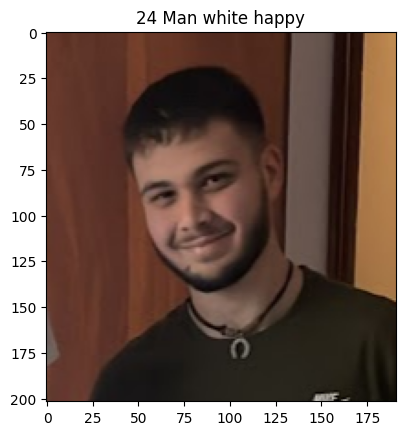

24 Man white happy


'if (auth_verified and genero == "Man"):\n    df = DeepFace.find(img_path = img3, db_path = "datasets/DatabaseGender59x65/Male", distance_metric = metrics[0], prog_bar = False, enforce_detection=False)\n    print(df)\n\nelif (auth_verified and genero == "Woman"):\n    df = DeepFace.find(img_path = img3, db_path = "datasets/DatabaseGender59x65/Female", enforce_detection=False)\n    print(df) '

In [69]:
img3 = cv2.imread("face_recognition_images/elputodavo.png")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
obj = DeepFace.analyze(img_path = img3, actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False)
edad = obj['age']
genero = obj['gender']
raza = obj['dominant_race']
emocion = obj['dominant_emotion']

plt.figure()
plt.imshow(img3)
plt.title(str(edad)+" " + genero + " " + raza + " " + emocion)
plt.show()
print(edad,genero,raza,emocion)

'''if (auth_verified and genero == "Man"):
    df = DeepFace.find(img_path = img3, db_path = "datasets/DatabaseGender59x65/Male", distance_metric = metrics[0], prog_bar = False, enforce_detection=False)
    print(df)

elif (auth_verified and genero == "Woman"):
    df = DeepFace.find(img_path = img3, db_path = "datasets/DatabaseGender59x65/Female", enforce_detection=False)
    print(df) '''

In [46]:
print(df.at[0, 'VGG-Face_cosine'])
print(df.at[0, 'identity'])

0.2932732977050604
datasets/DatabaseGender59x65/Male/kelsey_ID0_1.jpg
